In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [26]:
file = open('../app/input/rs1.dat', 'r')
data = file.readlines()
file.close()
data_int = [int(i) for i in data]
data_int = np.array(data_int)

In [33]:
len(data_int) * 0.1

3.7

In [27]:
#create basic info about dpm
info = {
    'zero_elevation' : 0., #describes the depth where we started counting
    'interval' : 0.1,    #interval of values read
    'type': ['DPL', 'DPM', 'DPH'], #type of ramsounding
    'dpm_limits' : {
        'weich' : 4,
        'breeig' : 8,
        'steif' : 14,
        'halbfest' : 28,
        'fest' : 100,
    }
}

In [28]:
#do some necessary calculations
total_depth = info['zero_elevation'] + len(data_int) * info['interval'], #depth calculation after form : total_depth = zero_elevation + (len(data_int)*0.1)

In [30]:
total_depth

(3.7,)

In [29]:
depth_array = np.arange(info['zero_elevation'], total_depth[0], info['interval'])
#expand depth_array to get a more nearest-neighbour like look
nn_depth_array = np.arange(info['zero_elevation'], total_depth[0], info['interval'] / 100)
nn_data_array = np.repeat(data_int,100)

In [22]:
#get transitions boundary indices for dpm_limits
#TODO: write a nice for n in info['dpm_limits] blabla loop.
#right now this is just for testing:
weich_indices  = np.where(np.logical_and(nn_data_array >= 0, nn_data_array < 4))
breiig_indices = np.where(np.logical_and(nn_data_array >= 4, nn_data_array < 8))
steif_indices  = np.where(np.logical_and(nn_data_array >= 8, nn_data_array < 14))
halbfest_indices  = np.where(np.logical_and(nn_data_array >= 14, nn_data_array < 28))
fest_indices = np.where(nn_data_array >= 28)

In [23]:
#Flag if you want the colorbar or not
with_color_coding = True

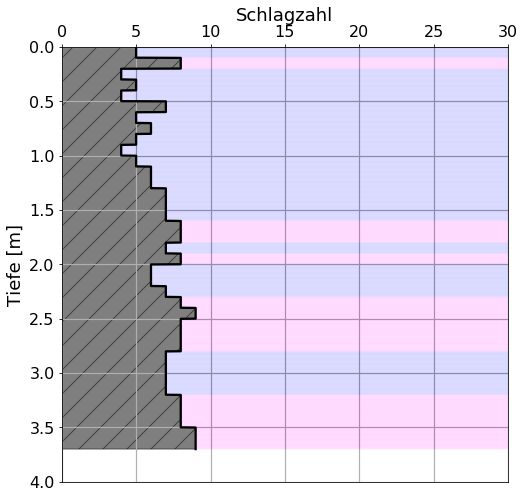

In [35]:
fig, ax = plt.subplots(1, figsize = [8,8])
ax.plot(nn_data_array, nn_depth_array, 'k', linewidth = 2.3)
ax.set_xlim([0,30])
ax.set_ylim(4,0)
ax.xaxis.tick_top()

if with_color_coding == True:
    for i in weich_indices:
        ax.hlines(nn_depth_array[i],nn_data_array[i] ,90,alpha = 0.01)
    for i in breiig_indices:
        ax.hlines(nn_depth_array[i],nn_data_array[i] ,90,alpha = 0.01, color = 'blue')
    for i in steif_indices:
        ax.hlines(nn_depth_array[i],nn_data_array[i] ,90, alpha = 0.01, color = 'magenta')
    for i in halbfest_indices:
        ax.hlines(nn_depth_array[i],nn_data_array[i] ,90, alpha = 0.01, color = 'yellow')
    for i in fest_indices:
        ax.hlines(nn_depth_array[i],nn_data_array[i] ,90, alpha = 0.02, color = 'red')

ax.axes.tick_params(labelsize = 16)
ax.set_xlabel('Schlagzahl', fontsize = 18)
ax.xaxis.set_label_position('top')

ax.set_ylabel('Tiefe [m]', fontsize = 18)

ax.grid(linewidth = 1.2)

ax.fill_betweenx(nn_depth_array, nn_data_array, hatch='/', color = 'k', alpha = 0.5)
##BETTER SOLUTION: TODO    
#for ind in weich_indices:
#    rect = patches.Rectangle(0,)
#rect = patches.Rectangle((0,0.5),100,100, linewidth = 1, facecolor = 'r')
#ax.add_patch(rect)
#plt.savefig('test.png', dpi = 720)

In [13]:
plt.savefig('test.png', dpi = 720)

<Figure size 432x288 with 0 Axes>